# MPG regression problem

In [1]:
import sys
import os
import random
import csv
from pprint import pprint

from matplotlib import pyplot as plt

module_path = os.path.abspath(os.path.join("..", ".."))
sys.path.append(module_path)

from perceptron import Perceptron, cross_validation
from perceptron.data_utils import transpose


In [2]:
with open("auto-mpg.csv", "rt") as f:
    data = [
        [float(value) for value in features]
        for *features, _ in [
            line for line in csv.reader(f) if line and "?" not in line
        ]
    ]

targets, *features = transpose(data)
targets = [[value] for value in targets]
features = transpose(features)

# Single layer model

Training: 100% |████████████████████████████████████████| 10/10, mae=2.55


target=[19.0], prediction=[22.15303388341321]
target=[19.4], prediction=[19.815977933105362]
target=[43.1], prediction=[32.16592997734705]
target=[23.8], prediction=[25.34445998244751]
target=[14.0], prediction=[12.70171063186836]
target=[16.0], prediction=[12.102878834133206]
target=[14.0], prediction=[11.61252524783843]
target=[20.0], prediction=[27.463796894958598]
target=[34.0], prediction=[30.923526769418764]
target=[15.0], prediction=[20.051478868796245]


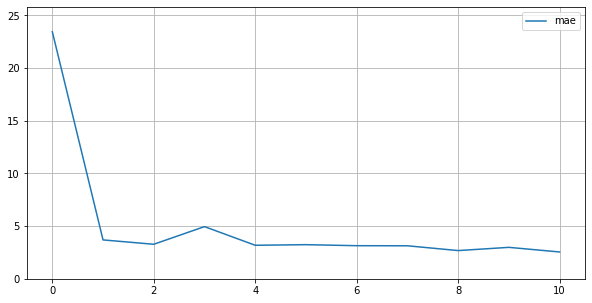

In [3]:
random.seed(0)

model = Perceptron(
    inputs=7,
    layer_sizes=[1],
    activations="linear",
    init_method="he",
    normalization="zscore",
    optimizer="momentum",
)

epochs = 10

history = model.train(
    training_inputs=features,
    training_targets=targets,
    epochs=epochs,
    base_learning_rate=0.01,
    learning_rate_decay="linear",
    metrics=["mae"],
)

for index in random.choices(range(len(features)), k=10):
    target = targets[index]
    prediction = model.predict(features[index])
    print(f"{target=}, {prediction=}")

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

ax.plot(range(epochs + 1), history["mae"], label="mae")

ax.set_ylim(bottom=0, top=max(history["mae"]) * 1.1)
ax.grid()
ax.legend()
plt.show()


# Multi-layer model

Training: 100% |████████████████████████████████████████| 25/25, mae=1.93


target=[11.0], prediction=[12.077614786022213]
target=[20.0], prediction=[17.269558816023157]
target=[29.0], prediction=[26.926810798175694]
target=[14.0], prediction=[14.143335994238246]
target=[15.0], prediction=[17.013053679665106]
target=[27.2], prediction=[23.024158885901414]
target=[31.0], prediction=[25.66527890125039]
target=[13.0], prediction=[11.913600083717085]
target=[20.6], prediction=[19.234276516340834]
target=[32.4], prediction=[34.668230022242106]


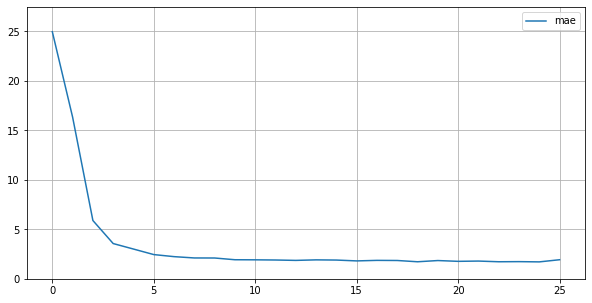

In [4]:
random.seed(0)

model = Perceptron(
    inputs=7,
    layer_sizes=[15, 5, 1],
    activations=["sigmoid"] * 2 + ["linear"],
    init_method="he",
    normalization="zscore",
    optimizer="adam",
)

epochs = 25

history = model.train(
    training_inputs=features,
    training_targets=targets,
    epochs=epochs,
    base_learning_rate=0.01,
    learning_rate_decay=None,
    metrics=["mae"],
)

for index in random.choices(range(len(features)), k=10):
    target = targets[index]
    prediction = model.predict(features[index])
    print(f"{target=}, {prediction=}")

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

ax.plot(range(epochs + 1), history["mae"], label="mae")

ax.set_ylim(bottom=0, top=max(history["mae"]) * 1.1)
ax.grid()
ax.legend()
plt.show()


# Cross validating multi-layer model

In [5]:
random.seed(0)

model_params = dict(
    inputs=7,
    layer_sizes=[15, 5, 1],
    activations=["sigmoid"] * 2 + ["linear"],
    init_method="he",
    normalization="zscore",
    optimizer="adam",
)

epochs = 25

history = cross_validation(
    inputs=features,
    targets=targets,
    fold_count=3,
    epoch=epochs,
    base_learning_rate=0.01,
    learning_rate_decay=None,
    model_params=model_params,
    metrics=["mae"],
)


Training: 100% |████████████████████████████████████████| 25/25, mae=1.75, val_mae=2.06
Training: 100% |████████████████████████████████████████| 25/25, mae=1.66, val_mae=2.1 
Training: 100% |████████████████████████████████████████| 25/25, mae=1.69, val_mae=1.89


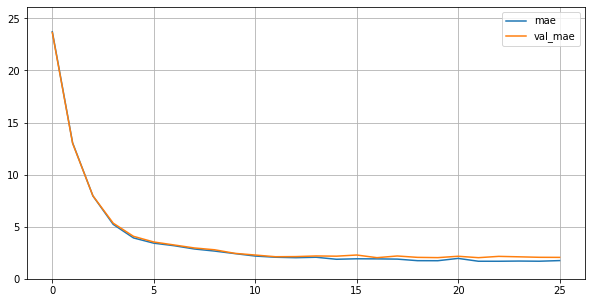

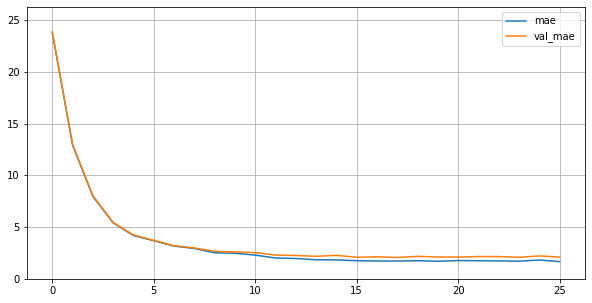

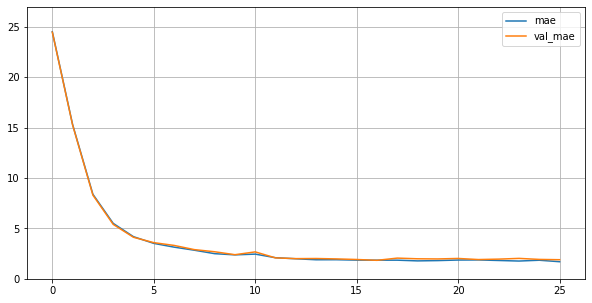

In [6]:
for run in history:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot()

    y_lim = 0.0
    for metric in ["mae", "val_mae"]:
        ax.plot(range(epochs + 1), run[metric], label=metric)
        y_lim = max(y_lim, max(run[metric]))

    ax.set_ylim(bottom=0, top=y_lim * 1.1)
    ax.grid()
    ax.legend()
    plt.show()
